<a href="https://colab.research.google.com/github/laura024/bigdata/blob/main/%EA%B8%B0%EB%A7%90%ED%8F%89%EA%B0%80%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기말고사
각 텍스트 문제 뒤에 코드블럭을 생성하여 문제에 대한 답을 코드로 적어보자. 과제는 올림픽 메달 집계 위키페이지 데이터를 지시대로 가공하는 것이다. 오픈북이니 마음껏 검색하거나 예전 수업자료를 보아도 된다. 단, 판다스 라이브러리를 사용해야 한다. 문제는 총 13문제이다.

*   코드를 완성, 실행한 후 깃허브 저장소에 **'기말고사(학번 이름)'의 파일명**으로 사본저장한다.
* 업로드 후 **저장소** 주소와 노션 포트폴리오 주소를 pdf로 작성하여 캔버스로 제출한다 (4시 반까지)

** 아래 코드로 데이터를 가져올 수 없다면 구글에서 '올림픽 메달 집계' 검색 후 위키페이지의 주소를 복사해서 알맞게 코드를 변형한다. (교재 p.252 참조)

In [ ]:
#글자깨짐 문제 수정을 위해 다음의 코드 실행 
#단계 1: 폰트 설치
import matplotlib.font_manager as fm
!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()


# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [4]:
#데이터 불러오기
import pandas as pd
df=pd.read_html('https://ko.wikipedia.org/wiki/%EC%98%AC%EB%A6%BC%ED%94%BD_%EB%A9%94%EB%8B%AC_%EC%A7%91%EA%B3%84', header=0, index_col=0) #맨 위의 헤더를 열 이름, 나라 이름을 인덱스 이름으로
df[0]

,하계 참가 횟수,Unnamed: 2,Unnamed: 3,Unnamed: 4,계,동계 참가 횟수,Unnamed: 7,Unnamed: 8,Unnamed: 9,계.1,전체 참가 횟수,Unnamed: 12,Unnamed: 13,Unnamed: 14,총합
국가 (IOC 코드),,,,,,,,,,,,,,,
아프가니스탄 (AFG),14,0,0,2,2,0,0,0,0,0,14,0,0,2,2
알제리 (ALG),13,5,4,8,17,3,0,0,0,0,16,5,4,8,17
아르헨티나 (ARG),24,21,25,28,74,19,0,0,0,0,43,21,25,28,74
아르메니아 (ARM),6,2,6,6,14,7,0,0,0,0,13,2,6,6,14
오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
독립 (IOA) [IOA],3,1,0,1,2,0,0,0,0,0,3,1,0,1,2
독립 참가 (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
러시아 출신 올림픽 선수 (OAR),0,0,0,0,0,1,2,6,9,17,1,2,6,9,17


1. 하계올림픽 관련 정보만 추출해서 summer라는 데이터프레임에 저장하자. summer 데이터프레임을 나타내보자.

In [114]:
summer=df[0].iloc[:,:5]
summer

,하계 참가 횟수,Unnamed: 2,Unnamed: 3,Unnamed: 4,계
국가 (IOC 코드),,,,,
아프가니스탄 (AFG),14,0,0,2,2
알제리 (ALG),13,5,4,8,17
아르헨티나 (ARG),24,21,25,28,74
아르메니아 (ARM),6,2,6,6,14
오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12
...,...,...,...,...,...
독립 (IOA) [IOA],3,1,0,1,2
독립 참가 (IOP) [IOP],1,0,1,2,3
러시아 출신 올림픽 선수 (OAR),0,0,0,0,0


2. 동계올림픽 관련 정보만 추출해서 winter라는 데이터프레임에 저장하자. winter 데이터프레임을 나타내보자.

In [115]:
winter=df[0].iloc[:,5:10]
winter

,동계 참가 횟수,Unnamed: 7,Unnamed: 8,Unnamed: 9,계.1
국가 (IOC 코드),,,,,
아프가니스탄 (AFG),0,0,0,0,0
알제리 (ALG),3,0,0,0,0
아르헨티나 (ARG),19,0,0,0,0
아르메니아 (ARM),7,0,0,0,0
오스트랄라시아 (ANZ) [ANZ],0,0,0,0,0
...,...,...,...,...,...
독립 (IOA) [IOA],0,0,0,0,0
독립 참가 (IOP) [IOP],0,0,0,0,0
러시아 출신 올림픽 선수 (OAR),1,2,6,9,17


3. summer 데이터 프레임 열 이름을 '하계참가횟수', '금', '은', '동', '하계 계'로 지어서 지정하자. 열 이름을 바꾼 후 summer 데이터프레임을 나타내보자.

In [116]:
summer.columns=["하계참가횟수","금","은","동","계"]
summer

,하계참가횟수,금,은,동,계
국가 (IOC 코드),,,,,
아프가니스탄 (AFG),14,0,0,2,2
알제리 (ALG),13,5,4,8,17
아르헨티나 (ARG),24,21,25,28,74
아르메니아 (ARM),6,2,6,6,14
오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12
...,...,...,...,...,...
독립 (IOA) [IOA],3,1,0,1,2
독립 참가 (IOP) [IOP],1,0,1,2,3
러시아 출신 올림픽 선수 (OAR),0,0,0,0,0


4. winter 데이터 프레임 열 이름을 '동계참가횟수', '금', '은', '동', '동계 계'로 지어서 지정하자. 열 이름을 바꾼 후 winter 데이터프레임을 나타내보자.

In [161]:
winter.columns=["동계참가횟수","금","은","동","계"]
winter

,동계참가횟수,금,은,동,계
국가 (IOC 코드),,,,,
아프가니스탄 (AFG),0,0,0,0,0
알제리 (ALG),3,0,0,0,0
아르헨티나 (ARG),19,0,0,0,0
아르메니아 (ARM),7,0,0,0,0
오스트랄라시아 (ANZ) [ANZ],0,0,0,0,0
...,...,...,...,...,...
독립 (IOA) [IOA],0,0,0,0,0
독립 참가 (IOP) [IOP],0,0,0,0,0
러시아 출신 올림픽 선수 (OAR),1,2,6,9,17


5. 동계와 하계 프레임을 합쳐보자. 합친 데이터프레임을 olympics_data로 이름짓는다. olympics_data 데이터프레임을 나타내보자.



In [162]:
olympics_data=pd.concat([summer, winter], axis = 1)
olympics_data

,하계참가횟수,금,은,동,계,동계참가횟수,금,은,동,계
국가 (IOC 코드),,,,,,,,,,
아프가니스탄 (AFG),14,0,0,2,2,0,0,0,0,0
알제리 (ALG),13,5,4,8,17,3,0,0,0,0
아르헨티나 (ARG),24,21,25,28,74,19,0,0,0,0
아르메니아 (ARM),6,2,6,6,14,7,0,0,0,0
오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
독립 (IOA) [IOA],3,1,0,1,2,0,0,0,0,0
독립 참가 (IOP) [IOP],1,0,1,2,3,0,0,0,0,0
러시아 출신 올림픽 선수 (OAR),0,0,0,0,0,1,2,6,9,17


6. 하계대회 참가횟수대비 하계 총 메달 수(rate1), 동계대회 참가횟수대비 동계 총 메달 수(rate2) 열을 생성해서 olympics_data 마지막 열에 붙여보자. olympics_data 데이터프레임을 나타내보자.

In [185]:
rate_table = pd.DataFrame(summer['계'] / (summer['하계참가횟수']), columns = ['rate1'])
rate_table

,rate1
국가 (IOC 코드),
아프가니스탄 (AFG),0.142857
알제리 (ALG),1.307692
아르헨티나 (ARG),3.083333
아르메니아 (ARM),2.333333
오스트랄라시아 (ANZ) [ANZ],6.000000
...,...
독립 (IOA) [IOA],0.666667
독립 참가 (IOP) [IOP],3.000000
러시아 출신 올림픽 선수 (OAR),NaN


In [164]:
olympics_data = pd.concat([olympics_data, rate_table], axis = 1)
olympics_data

,하계참가횟수,금,은,동,계,동계참가횟수,금,은,동,계,rate1
국가 (IOC 코드),,,,,,,,,,,
아프가니스탄 (AFG),14,0,0,2,2,0,0,0,0,0,0.142857
알제리 (ALG),13,5,4,8,17,3,0,0,0,0,1.307692
아르헨티나 (ARG),24,21,25,28,74,19,0,0,0,0,3.083333
아르메니아 (ARM),6,2,6,6,14,7,0,0,0,0,2.333333
오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,6.000000
...,...,...,...,...,...,...,...,...,...,...,...
독립 (IOA) [IOA],3,1,0,1,2,0,0,0,0,0,0.666667
독립 참가 (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,3.000000
러시아 출신 올림픽 선수 (OAR),0,0,0,0,0,1,2,6,9,17,NaN


In [165]:
rate_table = pd.DataFrame(winter['계'] / (winter['동계참가횟수']), columns = ['rate2'])
rate_table

,rate2
국가 (IOC 코드),
아프가니스탄 (AFG),NaN
알제리 (ALG),0.000000
아르헨티나 (ARG),0.000000
아르메니아 (ARM),0.000000
오스트랄라시아 (ANZ) [ANZ],NaN
...,...
독립 (IOA) [IOA],NaN
독립 참가 (IOP) [IOP],NaN
러시아 출신 올림픽 선수 (OAR),17.000000


In [166]:
olympics_data = pd.concat([olympics_data, rate_table], axis = 1)
olympics_data

,하계참가횟수,금,은,동,계,동계참가횟수,금,은,동,계,rate1,rate2
국가 (IOC 코드),,,,,,,,,,,,
아프가니스탄 (AFG),14,0,0,2,2,0,0,0,0,0,0.142857,NaN
알제리 (ALG),13,5,4,8,17,3,0,0,0,0,1.307692,0.000000
아르헨티나 (ARG),24,21,25,28,74,19,0,0,0,0,3.083333,0.000000
아르메니아 (ARM),6,2,6,6,14,7,0,0,0,0,2.333333,0.000000
오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,6.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
독립 (IOA) [IOA],3,1,0,1,2,0,0,0,0,0,0.666667,NaN
독립 참가 (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,3.000000,NaN
러시아 출신 올림픽 선수 (OAR),0,0,0,0,0,1,2,6,9,17,NaN,17.000000


7. olympics_data 데이터프레임의 기본정보를 조회해보자.
* rate1 과 rate2 의 결측치(NaN) 수는 각각 몇 개인가? (코드 칸에 #을 넣고 적어보자)

In [167]:
# 데이터프레임의 기본정보
#rate1의 결측치 1개 #rate1의 결측치 43개
olympics_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 아프가니스탄 (AFG) to 총합
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   하계참가횟수  153 non-null    int64  
 1   금       153 non-null    int64  
 2   은       153 non-null    int64  
 3   동       153 non-null    int64  
 4   계       153 non-null    int64  
 5   동계참가횟수  153 non-null    int64  
 6   금       153 non-null    int64  
 7   은       153 non-null    int64  
 8   동       153 non-null    int64  
 9   계       153 non-null    int64  
 10  rate1   152 non-null    float64
 11  rate2   110 non-null    float64
dtypes: float64(2), int64(10)
memory usage: 19.6+ KB


8. 국가가 '총합'과 '연합 (EUN) [EUN]'인 행을 제거한 후 olympics_data 데이터프레임을 나타내보자.

In [168]:
olympics_data=olympics_data.drop('총합', axis=0)
olympics_data=olympics_data.drop('연합 (EUN) [EUN]', axis=0)
olympics_data

,하계참가횟수,금,은,동,계,동계참가횟수,금,은,동,계,rate1,rate2
국가 (IOC 코드),,,,,,,,,,,,
아프가니스탄 (AFG),14,0,0,2,2,0,0,0,0,0,0.142857,NaN
알제리 (ALG),13,5,4,8,17,3,0,0,0,0,1.307692,0.0
아르헨티나 (ARG),24,21,25,28,74,19,0,0,0,0,3.083333,0.0
아르메니아 (ARM),6,2,6,6,14,7,0,0,0,0,2.333333,0.0
오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,6.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
짐바브웨 (ZIM) [ZIM],13,3,4,1,8,1,0,0,0,0,0.615385,0.0
독립 (IOA) [IOA],3,1,0,1,2,0,0,0,0,0,0.666667,NaN
독립 참가 (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,3.000000,NaN


9. 하계참가횟수 당 평균 메달 수가 15이상인 국가를 나타내보자. 

* 이 중 아시아 국가는 어느 국가인가?(코드 뒤 #을 넣고 써 보자)


In [175]:
u_15= olympics_data[(summer['계']/summer['하계참가횟수'] > 15)]
u_15
# 대한민국 일본 중화인민공화국국

<ipython-input-175-30f7abc90d58>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  u_15= olympics_data[(summer['계']/summer['하계참가횟수'] > 15)]


,하계참가횟수,금,은,동,계,동계참가횟수,금,은,동,계,rate1,rate2
국가 (IOC 코드),,,,,,,,,,,,
오스트레일리아 (AUS) [AUS] [Z],26,147,163,187,497,19,5,5,5,15,19.115385,0.789474
중화인민공화국 (CHN) [CHN],10,224,167,155,546,11,13,28,21,62,54.600000,5.636364
프랑스 (FRA) [O] [P] [Z],28,212,241,263,716,23,36,35,53,124,25.571429,5.391304
독일 (GER) [GER] [Z],16,191,194,230,615,12,92,88,60,240,38.437500,20.000000
독일 연합 (EUA) [EUA],3,28,54,36,118,3,8,6,5,19,39.333333,6.333333
동독 (GDR) [GDR],5,153,129,127,409,6,39,36,35,110,81.800000,18.333333
서독 (FRG) [FRG],5,56,67,81,204,6,11,15,13,39,40.800000,6.500000
영국 (GBR) [GBR] [Z],28,263,295,293,851,23,11,4,17,32,30.392857,1.391304
헝가리 (HUN),26,175,147,169,491,23,1,2,4,7,18.884615,0.304348


10. olympics_data 데이터프레임의 rate1 변수가 높은대로 정렬해보자. 

* 어느 국가가 가장 하계대회 참가횟수당 평균 메달 수가 많은가?  (코드 칸에 #을 넣고 나라 이름과 참가횟수 당 평균 메달 수까지 적어보자.)

In [182]:
olympics_data=olympics_data.sort_values(by= 'rate1', ascending = False)
olympics_data

#하계대회 참가횟수당 평균 메달 수가 많은 나라:소련, 참가횟수 당 평균 메달 수: 약 112개개

,하계참가횟수,금,은,동,계,동계참가횟수,금,은,동,계,rate1,rate2
국가 (IOC 코드),,,,,,,,,,,,
소련 (URS) [URS],9,395,319,296,1010,9,78,57,59,194,112.222222,21.555556
미국 (USA) [P] [Q] [R] [Z] [F],27,1022,795,706,2523,23,105,112,88,305,93.444444,13.260870
동독 (GDR) [GDR],5,153,129,127,409,6,39,36,35,110,81.800000,18.333333
러시아 (RUS) [RUS],6,148,125,153,426,6,47,38,35,120,71.000000,20.000000
중화인민공화국 (CHN) [CHN],10,224,167,155,546,11,13,28,21,62,54.600000,5.636364
...,...,...,...,...,...,...,...,...,...,...,...,...
과테말라 (GUA),14,0,1,0,1,1,0,0,0,0,0.071429,0.000000
가이아나 (GUY) [GUY],17,0,0,1,1,0,0,0,0,0,0.058824,NaN
버뮤다 (BER),18,0,0,1,1,8,0,0,0,0,0.055556,0.000000


11. rate1 변수가 높은 순서대로 정렬하여 엑셀파일로 추출해보자. 파일 이름은 olympics.xlsx로 한다.

In [192]:
summer.to_excel("olympics.xlsx")

12. rate2 변수가 높은대로 정렬해보자. 
* 어느 국가가 가장 동계대회 참가횟수당 평균 메달 수가 많은가? (코드 칸에 #을 넣고 나라 이름과 참가횟수 당 평균 메달 수까지 적어보자.)

In [183]:
olympics_data=olympics_data.sort_values(by= 'rate2', ascending = False)
olympics_data
#동계계대회 참가횟수당 평균 메달 수가 많은 나라:소련, 참가횟수 당 평균 메달 수: 약 21개

,하계참가횟수,금,은,동,계,동계참가횟수,금,은,동,계,rate1,rate2
국가 (IOC 코드),,,,,,,,,,,,
소련 (URS) [URS],9,395,319,296,1010,9,78,57,59,194,112.222222,21.555556
독일 (GER) [GER] [Z],16,191,194,230,615,12,92,88,60,240,38.437500,20.000000
러시아 (RUS) [RUS],6,148,125,153,426,6,47,38,35,120,71.000000,20.000000
동독 (GDR) [GDR],5,153,129,127,409,6,39,36,35,110,81.800000,18.333333
러시아 출신 올림픽 선수 (OAR),0,0,0,0,0,1,2,6,9,17,NaN,17.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
가봉 (GAB),10,0,1,0,1,0,0,0,0,0,0.100000,NaN
바베이도스 (BAR) [BAR],12,0,0,1,1,0,0,0,0,0,0.083333,NaN
수단 (SUD),12,0,1,0,1,0,0,0,0,0,0.083333,NaN


13. 하계참가횟수, 동계참가횟수, rate1, rate2의 상관관계를 히트맵(matplotlib & seaborn)으로 그려보자. 

* 하계대회 참가횟수 대비 메달 수와 동계대회 참가횟수 대비 메달 수의 상관계수는 얼마인가?  둘의 상관관계는 높은가 낮은가? 상관관계가 높다면(낮다면) 그 이유는 무엇이라고 생각하는가?(코드 뒤에 #을 넣어서 적어보자)

In [242]:
# 라이브러리 환경
import pandas as pd
import numpy as np

In [243]:

# sklearn 데이터셋에서 iris 데이터셋 로딩
from sklearn import datasets
iris = datasets.load_iris()

# iris 데이터셋은 딕셔너리 형태이므로, key 값을 확인
iris.keys()
     

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [210]:
# DESCR 키를 이용하여 데이터셋 설명(Description) 출력
print(iris['DESCR'])
     

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [240]:
print("특성의 이름: \n{}".format(iris['feature_names']))

특성의 이름: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [214]:
print("타깃의 이름: {}".format(iris['target_names']))

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [215]:
# data는 꽃잎의 길이와 폭, 꽃받침의 길이와 폭을 수치 값으로 가지고 있는 NumPy 배열이다.
# data 속성의 데이터셋 크기
print("데이터셋 크기:", iris['data'].shape)
# data 속성의 데이터셋 내용 (첫 7개 행을 추출)
print("데이터셋 내용: \n", iris['data'][:7, :])

데이터셋 크기: (150, 4)
데이터셋 내용: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]]


In [ ]:

# data 속성을 판다스 데이터프레임으로 변환
olympics_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("데이터프레임의 형태:", df.shape)
olympics_data.head()

In [276]:
# 열(column) 이름을 간결하게 변경
olympics_data.columns = ["하계참가횟수, 동계참가횟수, rate1, rate2"]
olympics_data.head(2)
     

ValueError: ignored

In [262]:
# Target 열 추가
olympics_data['Target'] = iris['target']
print('데이터셋의 크기: ', olympics_data.shape)
olympics_data.head()

데이터셋의 크기:  (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [263]:
# 데이터프레임의 기본정보
olympics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [264]:
# 통계정보 요약
olympics_data.describe()
     

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [265]:
# 결측값 확인
olympics_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

In [266]:

# 중복 데이터 확인
olympics_data.duplicated().sum()
     

1

In [267]:
# 중복 데이터 출력
olympics_data.loc[olympics_data.duplicated(), :]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
142,5.8,2.7,5.1,1.9,2


In [274]:

# 중복 데이터 제거
olympics_data = olympics_data.drop_duplicates()


In [269]:
# 변수 간의 상관관계 분석
olympics_data.corr()
     

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
sepal length (cm),1.000000,-0.118129,0.873738,0.820620,0.786971
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal length (cm),0.873738,-0.426028,1.000000,0.962772,0.949402
petal width (cm),0.820620,-0.362894,0.962772,1.000000,0.956514
Target,0.786971,-0.422987,0.949402,0.956514,1.000000


In [270]:
olympics_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   Target             149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


In [271]:
olympics_data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
sepal length (cm),1.000000,-0.118129,0.873738,0.820620,0.786971
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal length (cm),0.873738,-0.426028,1.000000,0.962772,0.949402
petal width (cm),0.820620,-0.362894,0.962772,1.000000,0.956514
Target,0.786971,-0.422987,0.949402,0.956514,1.000000


In [272]:
# 시각화 라이브러리 설정
import matplotlib.pyplot as plt
# seaborn 라이브러리를 사용해보자.
import seaborn as sns
sns.set(font_scale=1.2)
     

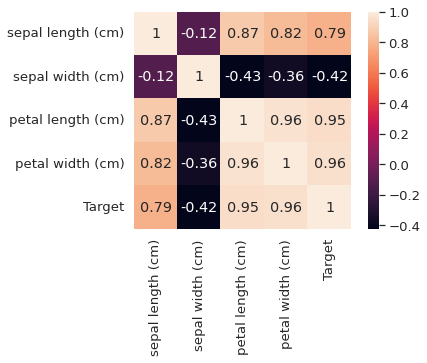

In [273]:

# 상관계수 히트맵
sns.heatmap(data=olympics_data.corr(), square=True, annot=True)
plt.show()

학번: 21006041

이름: 이재은